In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [4]:
dataset = pd.read_csv("./dataset/occupancy_est.csv")
#average out s1_temp, s2_temp, s3_temp and s4_temp into temperature
dataset.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

## Data Description

In [5]:
dataset.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


## Check for misising or null values

In [6]:
dataset.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

# Data Pre-processing
## 1. Split the data into training and testing sets
## 2. Feature Scaling

In [7]:

# Scaling the data
scaler = StandardScaler()
encoder = OneHotEncoder()
# Select only the numeric columns
numeric_columns = dataset.select_dtypes(include=np.number).columns
numeric_columns = numeric_columns.drop('Room_Occupancy_Count')


dataset.drop("Date",axis=1,inplace=True)
dataset.head()
# dataset[numeric_columns] = scaler.fit_transform(dataset[numeric_columns])
# dataset.head()

,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


Date is irrelevant in predicting the number of people (in this context)

But the time of the day is relevant; so we convert it to numerical form which eases processing for our model

In [8]:
time = pd.to_datetime(dataset["Time"],format="%H:%M:%S")
dataset["Time"] = time.dt.hour + time.dt.minute/60
dataset.head()

,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,10.816667,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,10.833333,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,10.833333,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,10.850000,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,10.850000,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [9]:

#splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('Room_Occupancy_Count', axis=1), dataset['Room_Occupancy_Count'], test_size=0.3, random_state=42)

## Standardizing numerical data

In [10]:
x_train[numeric_columns].head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
8582,25.56,25.50,25.25,25.63,0,0,0,0,0.07,0.05,0.06,0.09,485,-1.488462,0,0
1166,25.69,25.69,25.31,25.88,0,0,0,0,0.08,0.05,0.05,0.06,620,-2.138462,0,0
254,26.00,27.69,25.81,26.19,163,252,267,70,0.08,0.13,0.13,0.07,880,1.246154,0,0
415,26.00,26.13,25.81,26.31,16,20,93,57,0.07,0.05,0.06,0.06,755,-3.665385,0,0
3334,26.06,26.81,25.56,26.31,118,22,33,23,0.18,0.05,0.07,0.07,475,0.911538,0,0


In [11]:
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = scaler.fit_transform(x_test[numeric_columns])

In [32]:
x_train.head()

,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
8582,19.70,0.307483,-0.081619,0.453988,-0.340996,-0.495077,-0.383448,-0.588490,-0.677416,-0.312446,-0.262894,-0.235407,-0.116352,0.117912,-1.266871,-0.311198,-0.292845
1166,21.45,0.676234,0.237102,0.593621,0.357306,-0.495077,-0.383448,-0.588490,-0.677416,-0.279580,-0.262894,-0.259533,-0.359721,0.785640,-1.824270,-0.311198,-0.292845
254,13.45,1.555564,3.592063,1.757222,1.223201,2.731205,3.402888,3.977691,2.928541,-0.279580,0.048759,-0.066525,-0.278598,2.071635,1.078167,-0.311198,-0.292845
415,14.85,1.555564,0.975194,1.757222,1.558386,-0.178387,-0.082946,1.001977,2.258864,-0.312446,-0.262894,-0.235407,-0.359721,1.453368,-3.133665,-0.311198,-0.292845
3334,16.15,1.725757,2.115880,1.175421,1.558386,1.840513,-0.052895,-0.024131,0.507399,0.049081,-0.262894,-0.211281,-0.278598,0.068451,0.791221,-0.311198,-0.292845


In [12]:
x_test.head()

,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
8855,22.050000,-0.429469,-0.408790,-0.143742,-0.904352,-0.507645,-0.393839,-0.581753,-0.668043,-0.306643,-0.298973,-0.241496,-0.198169,-0.514514,-0.008487,-0.322936,-0.296778
532,15.866667,1.723022,0.479884,1.493308,1.562879,1.775923,0.055466,0.431653,1.228718,-0.277560,-0.264245,-0.241496,-0.285589,0.666983,0.633641,-0.322936,-0.296778
1155,21.350000,0.661127,0.373243,0.591744,0.513597,-0.507645,-0.393839,-0.581753,-0.668043,-0.306643,-0.264245,-0.241496,-0.373009,0.949515,-1.908390,-0.322936,-0.296778
7769,6.450000,-0.773867,-0.622072,-1.021580,-0.904352,-0.507645,-0.393839,-0.581753,-0.668043,-0.277560,-0.229518,-0.241496,-0.110749,-0.565884,-0.084615,-0.322936,-0.296778
4922,5.883333,-0.773867,-0.622072,-1.021580,-0.734198,-0.507645,-0.393839,-0.581753,-0.668043,-0.335726,-0.264245,-0.241496,-0.373009,-0.514514,-0.028346,-0.322936,-0.296778


In [13]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)


LinearRegression()

In [14]:
pd.DataFrame(linear_reg_model.coef_, index=x_train.columns, columns=["Coefficient"])

,Coefficient
Time,-0.002668
S1_Temp,0.049802
S2_Temp,0.081505
S3_Temp,0.346488
S4_Temp,-0.249201
S1_Light,0.266951
S2_Light,0.047473
S3_Light,0.150840
S4_Light,-0.076844
S1_Sound,0.022818


# Model Residuals

Testing the readings for a datapoint

In [15]:
x_test.head()

,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
8855,22.050000,-0.429469,-0.408790,-0.143742,-0.904352,-0.507645,-0.393839,-0.581753,-0.668043,-0.306643,-0.298973,-0.241496,-0.198169,-0.514514,-0.008487,-0.322936,-0.296778
532,15.866667,1.723022,0.479884,1.493308,1.562879,1.775923,0.055466,0.431653,1.228718,-0.277560,-0.264245,-0.241496,-0.285589,0.666983,0.633641,-0.322936,-0.296778
1155,21.350000,0.661127,0.373243,0.591744,0.513597,-0.507645,-0.393839,-0.581753,-0.668043,-0.306643,-0.264245,-0.241496,-0.373009,0.949515,-1.908390,-0.322936,-0.296778
7769,6.450000,-0.773867,-0.622072,-1.021580,-0.904352,-0.507645,-0.393839,-0.581753,-0.668043,-0.277560,-0.229518,-0.241496,-0.110749,-0.565884,-0.084615,-0.322936,-0.296778
4922,5.883333,-0.773867,-0.622072,-1.021580,-0.734198,-0.507645,-0.393839,-0.581753,-0.668043,-0.335726,-0.264245,-0.241496,-0.373009,-0.514514,-0.028346,-0.322936,-0.296778


In [27]:
val = 4
prediction = linear_reg_model.predict([x_test.iloc[val]])
print(prediction,y_test.iloc[val])

[-0.10049936] 0


/home/kelmith/Kelmith/Projects/ML_class/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


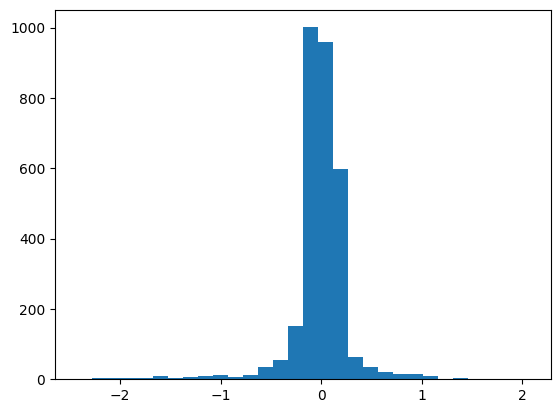

In [17]:
predictions = linear_reg_model.predict(x_test)
plt.hist(predictions-y_test, bins=30);

They are normally distributed. Good sign.

# Performance Evaluation

- Mean absolute error
- Mean squared error
- Root mean squared error

In [18]:
from sklearn import metrics

In [19]:
metrics.mean_absolute_error(y_test, predictions)

0.1648601579758029

In [20]:
metrics.mean_squared_error(y_test, predictions)

0.08878532068061333

In [21]:
metrics.root_mean_squared_error(y_test, predictions)

0.29796865721181703

In [22]:
import pickle
filename = "regression_model.pickle"
pickle.dump(linear_reg_model, open(filename, "wb"))

In [23]:
data_sample = x_test.iloc[8]
data_sample

Time            23.233333
S1_Temp         -0.056370
S2_Temp         -0.071094
S3_Temp         -0.001390
S4_Temp          0.144930
S1_Light        -0.507645
S2_Light        -0.393839
S3_Light        -0.581753
S4_Light        -0.668043
S1_Sound        -0.306643
S2_Sound        -0.298973
S3_Sound        -0.241496
S4_Sound        -0.373009
S5_CO2          -0.360406
S5_CO2_Slope    -0.008487
S6_PIR          -0.322936
S7_PIR          -0.296778
Name: 1373, dtype: float64

In [24]:
output = linear_reg_model.predict([data_sample])
print(output,y_test.iloc[8])

[0.07265741] 0


/home/kelmith/Kelmith/Projects/ML_class/venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Clearly Linear Regression model is out of it's mind